# **Writing a video using OpenCV**

While building applications, it becomes important to save demo videos of your work as well as many applications themselves might require saving a video clip. For example, in a surveiallance application, you might have to save a video clip as soon as you see something unusual happening.

In this notebook, we will describe how to save a video in avi and mp4 formats using openCV.

**PIPELINE**

>Video Source  →  Frame by frame reading  →  Save frames  →  New video file


In [1]:
# Import the library
import os
import cv2
import matplotlib.pyplot as plt 

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo,display,HTML
from base64 import b64encode
%matplotlib inline

**Download Assets**

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

**Read Video from Source**

In [4]:
source='race_car.mp4' # source=0 for webcam

cap=cv2.VideoCapture(source)

if not cap.isOpened():
    print("Error in opening video file")

**Read and display one frame**

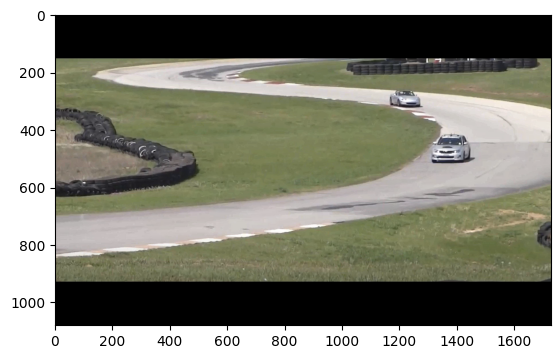

In [5]:
ret,frame=cap.read()
plt.imshow(frame[...,::-1])


**Write Video using OpenCV**

**Function Syntax**

**VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )**
where, **Parameters**

1.**filename:** Name of the output video file.

2.**fourcc:** 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

3.**fps:** Framerate of the created video stream.

4.**frameSize:** Size of the video frames.

In [6]:
# Get video properties
frame_width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)

print("Width:",frame_width)
print("Height:",frame_height)
print("FPS:",fps)

Width: 1728
Height: 1080
FPS: 30.0


 **Define VideoWriter**

In [7]:
fourcc=cv2.VideoWriter_fourcc(*'mp4v') 
out=cv2.VideoWriter("output_video.mp4",fourcc,fps,(frame_width,frame_height))

**Read and Write frames**

In [8]:
while True:
    ret, frame = cap.read()

    if not ret:
        break   # video ended

    # Write frame to output file
    out.write(frame)

    # Show frame (optional)
    cv2.imshow("Video Preview", frame)

    # Press ESC to exit early
    if cv2.waitKey(1) == 27:
        break

# Release Resources
cap.release()
out.release()
cv2.destroyAllWindows()
